# Impact of Coworking Spaces on Social Wellbeing Indicators
**Authored by:** Thakoor Madhuvaishali

**Duration:** 150 mins

**Level:** Intermediate

**Pre-requisite Skills:** Python, Data Analysis, Data Cleaning, Data Visualization

Scenario:

As a community researcher, I want to analyze the impact of coworking spaces on social wellbeing indicators. Many individuals use coworking spaces not only for professional purposes but also for the social interactions and support they provide. Understanding this impact can help policymakers and business owners create environments that foster community wellbeing and collaboration.

What this use dase will teach you

At the end of this use case, you will:

Learn how to use Python for analyzing and visualizing social wellbeing indicators in relation to coworking spaces.
Gain experience in statistical analysis to evaluate the relationships between coworking space proximity and various social wellbeing outcomes (e.g., mental health, community engagement).
Understand how to integrate and analyze multiple datasets to provide insights into the effectiveness of coworking spaces as support environments.

Introduction:

Coworking spaces have emerged as vital hubs for freelancers, entrepreneurs, and remote workers, offering more than just a place to work. These spaces foster social connections, collaboration, and community engagement, which can significantly impact social wellbeing. This use case aims to explore how proximity to coworking spaces correlates with social wellbeing indicators, such as mental health, social interaction, and community support.

By analyzing datasets related to social wellbeing indicators and the locations of coworking spaces, this project will provide valuable insights into how these environments contribute to individual and community health. The results can inform stakeholders about the benefits of coworking spaces and help optimize their locations and services to better support community wellbeing.

Datasets List:

Social Wellbeing Indicators

This dataset includes various social wellbeing metrics, such as mental health status, community engagement, and access to support services. It captures responses from different demographic groups and allows for analysis based on proximity to coworking spaces.

Coworking Space Locations

This dataset provides the geographic locations of coworking spaces in the area, including their amenities and services. It is crucial for understanding how accessibility to these spaces influences social wellbeing.




# **Importing modules and fetching data from Open Data Melbourne**

In [ ]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='coworking-spaces'

url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    df_coworking=pd.read_csv(StringIO(url_content),delimiter=';')
    print(df_coworking.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

      organisation                                            address  \
0       11th Space              11/568 Collins St, Melbourne VIC 3000   
1      360 Collins                 360 Collins Street, Melbourne 3000   
2  Christie Spaces                 454 Collins St, Melbourne VIC 3000   
3      The Cluster         Level 17, 31 Queen Street, Melbourne, 3000   
4    Hatch Quarter  Innovation Hub 7/677 La Trobe Street, Dockland...   
5              Hub  Collins Street: Georges Building, Mezzanine an...   
6            Regus                  385 Bourke Street, Melbourne 3000   
7            Regus                 367 Collins Street, Melbourne 3000   
8            Regus                180 Lonsdale Street, Melbourne 3000   
9         Servcorp       Level 40, 140 William Street, Melbourne 3000   

                                             website   latitude   longitude  \
0                         https://www.11thspace.com/ -37.818537  144.955502   
1       https://officespace.com.au/mel

In [ ]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='social-indicators-for-city-of-melbourne-residents-2023'

url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    df_socialindicators=pd.read_csv(StringIO(url_content),delimiter=';')
    print(df_socialindicators.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

  indicator                    type              topic  \
0        18                   Other             Health   
1        18                   Other             Health   
2        18                   Other             Health   
3        19                   Other             Health   
4        19                   Other             Health   
5        19                   Other             Health   
6        19                   Other             Health   
7        19                   Other             Health   
8        19                   Other             Health   
9         1  Council Plan Indicator  Physical activity   

                                 description  \
0                          Smoking behaviour   
1                          Smoking behaviour   
2                          Smoking behaviour   
3                           Vaping behaviour   
4                           Vaping behaviour   
5                           Vaping behaviour   
6                        

# **Exploratory Analysis**

In [ ]:
df_socialindicators.head()

,indicator,type,topic,description,response,respondent_group,year,sample_size,result,format
0,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,Male,2023,569,18.0,Per cent
1,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,Kensington / Flemington 3031,2023,89,16.4,Per cent
2,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,South Yarra 3141 / Melbourne/St Kilda Road 3004,2023,138,12.2,Per cent
3,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,35-44 years,2023,228,5.5,Per cent
4,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,45-54 years,2023,128,8.1,Per cent


In [ ]:
df_socialindicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   indicator         594 non-null    object 
 1   type              594 non-null    object 
 2   topic             594 non-null    object 
 3   description       594 non-null    object 
 4   response          594 non-null    object 
 5   respondent_group  594 non-null    object 
 6   year              594 non-null    int64  
 7   sample_size       594 non-null    int64  
 8   result            594 non-null    float64
 9   format            594 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 46.5+ KB


<ipython-input-5-b3ba7e62ce98>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')


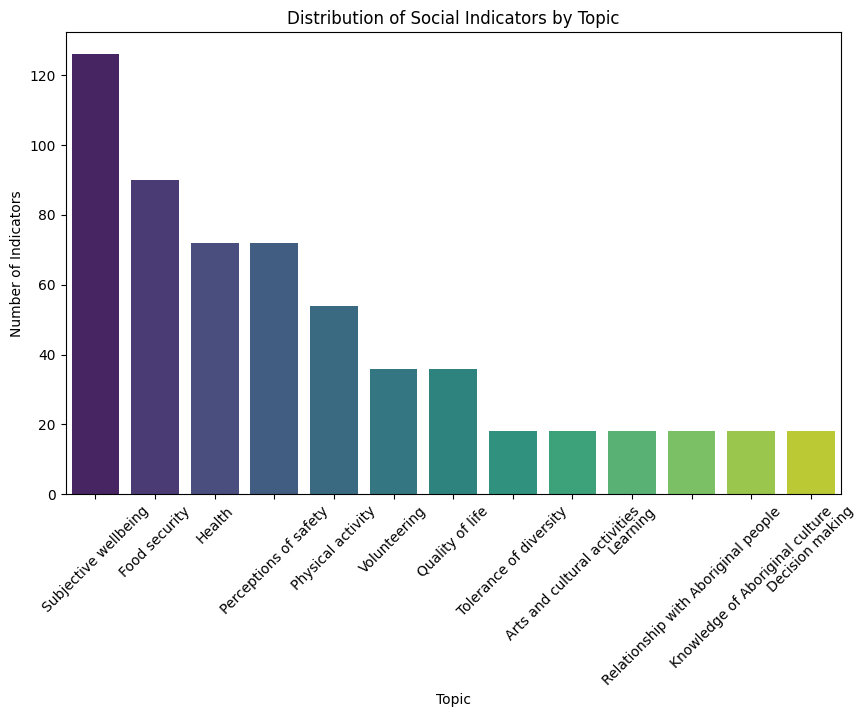

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of indicators per topic
topic_counts = df_socialindicators['topic'].value_counts()

# Plot the distribution of indicators by topic
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')
plt.title('Distribution of Social Indicators by Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Indicators')
plt.xticks(rotation=45)
plt.show()

<ipython-input-6-73314782aa90>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=indicator_type_counts.index, y=indicator_type_counts.values, palette='coolwarm')


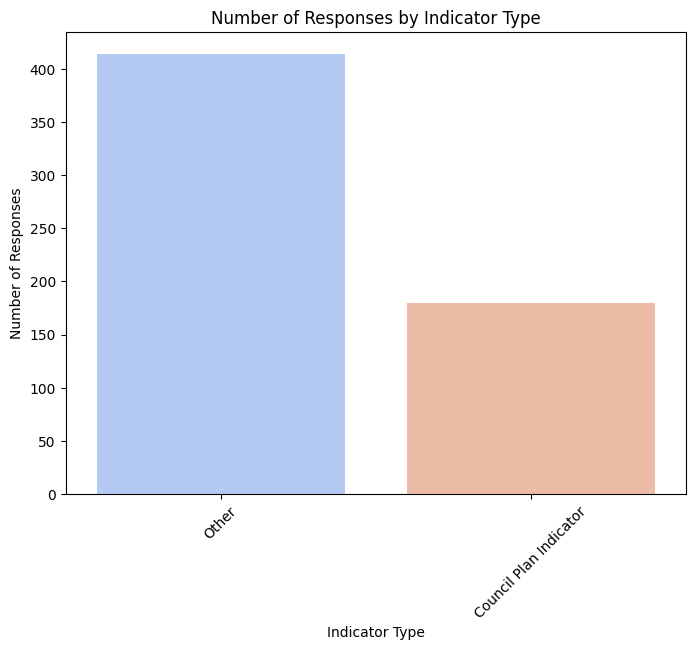

In [ ]:
# Count the number of responses for each indicator type
indicator_type_counts = df_socialindicators['type'].value_counts()

# Plot the distribution of responses by indicator type
plt.figure(figsize=(8, 6))
sns.barplot(x=indicator_type_counts.index, y=indicator_type_counts.values, palette='coolwarm')
plt.title('Number of Responses by Indicator Type')
plt.xlabel('Indicator Type')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

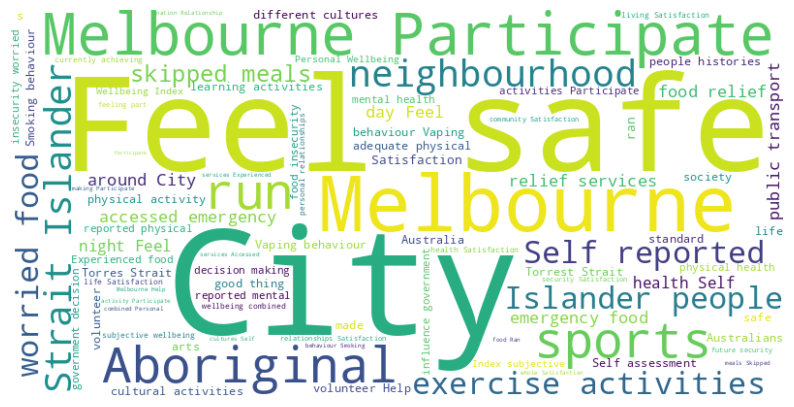

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into a single string
text = " ".join(description for description in df_socialindicators['description'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_width=3, contour_color='steelblue').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes
plt


In [ ]:
df_coworking.head(5)

,organisation,address,website,latitude,longitude,geopoint
0,11th Space,"11/568 Collins St, Melbourne VIC 3000",https://www.11thspace.com/,-37.818537,144.955502,"-37.8185368, 144.9555017"
1,360 Collins,"360 Collins Street, Melbourne 3000",https://officespace.com.au/melbourne/153369/,-37.816000,144.962000,"-37.816002, 144.962311"
2,Christie Spaces,"454 Collins St, Melbourne VIC 3000",https://www.christiespaces.com.au/spaces/,-37.817329,144.959269,"-37.8173293, 144.9592691"
3,The Cluster,"Level 17, 31 Queen Street, Melbourne, 3000",http://www.thecluster.com.au/,-37.818000,144.962000,"-37.8182314, 144.961787"
4,Hatch Quarter,"Innovation Hub 7/677 La Trobe Street, Dockland...",http://www.hatchquarter.com.au/,-37.815000,144.947000,"-37.8146, 144.94731"


In [ ]:
df_coworking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   organisation  44 non-null     object 
 1   address       44 non-null     object 
 2   website       44 non-null     object 
 3   latitude      43 non-null     float64
 4   longitude     43 non-null     float64
 5   geopoint      43 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.2+ KB


In [ ]:
# Check for missing values in the dataset
missing_values = df_coworking.isnull().sum()

# Display the missing values
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 organisation    0
address         0
website         0
latitude        1
longitude       1
geopoint        1
dtype: int64


In [ ]:
# Remove rows with missing values in specific columns
df_coworking = df_coworking.dropna(subset=['latitude', 'longitude', 'geopoint'])

# Check the dataset after removing missing values
print("Number of rows after removing missing values:", df_coworking.shape[0])

Number of rows after removing missing values: 43


In [ ]:
import folium

# Create a base map centered around Melbourne
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)

# Add markers for each coworking space
for index, row in df_coworking.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"{row['organisation']}: {row['address']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(melbourne_map)

# Display the map
melbourne_map.save("coworking_spaces_map.html")
melbourne_map


In [ ]:
# Filter geographic respondent groups
geographic_indicators_df = df_socialindicators[
    df_socialindicators['respondent_group'].str.contains(r'\d{4}')  # Matches postcodes
]

# Group by respondent_group (suburbs) and calculate the mean of well-being indicators
grouped_indicators = geographic_indicators_df.groupby('respondent_group').agg({
    'result': 'mean'
}).reset_index()

print(grouped_indicators)

                                  respondent_group     result
0                                     Carlton 3053  51.187879
1                                   Docklands 3008  50.666667
2                              East Melbourne 3002  53.548485
3                     Kensington / Flemington 3031  52.948485
4                                   Melbourne 3000  50.227273
5       North Melbourne 3051 / West Melbourne 3003  54.227273
6                                   Parkville 3052  53.809091
7                     South Wharf / Southbank 3006  52.381818
8  South Yarra 3141 / Melbourne/St Kilda Road 3004  52.945455


In [ ]:
import pandas as pd
import re

# Function to extract the postcode from the address
def extract_postcode(address):
    match = re.search(r'\d{4}', address)  # Finds any 4-digit number, which is typically a postcode
    return match.group(0) if match else None

# Apply the function to extract postcodes from the coworking dataset
df_coworking['postcode'] = df_coworking['address'].apply(extract_postcode)

# Drop rows where postcode could not be extracted
df_coworking = df_coworking.dropna(subset=['postcode'])

# Count the number of coworking spaces in each postcode
coworking_count_by_postcode = df_coworking.groupby('postcode').size().reset_index(name='coworking_count')
print(coworking_count_by_postcode)


  postcode  coworking_count
0     3000               38
1     3006                2
2     3008                1
3     3051                1
4     3053                1


In [ ]:
# Extract the postcode from the respondent group column in the social indicator dataset
geographic_indicators_df['postcode'] = geographic_indicators_df['respondent_group'].str.extract(r'(\d{4})')

# Merge coworking counts with social indicators dataset on postcode
merged_df = pd.merge(geographic_indicators_df, coworking_count_by_postcode, on='postcode', how='left')

# Fill NaN values in coworking_count with 0 (suburbs without coworking spaces)
merged_df['coworking_count'] = merged_df['coworking_count'].fillna(0)

# Display the merged dataset
print(merged_df.head())


  indicator   type   topic        description  \
0        18  Other  Health  Smoking behaviour   
1        18  Other  Health  Smoking behaviour   
2        19  Other  Health   Vaping behaviour   
3        19  Other  Health   Vaping behaviour   
4        19  Other  Health   Vaping behaviour   

                                         response  \
0  Reported as smoke daliy or smoke occassionally   
1  Reported as smoke daliy or smoke occassionally   
2    Reported as vape daliy or vape occassionally   
3    Reported as vape daliy or vape occassionally   
4    Reported as vape daliy or vape occassionally   

                                  respondent_group  year  sample_size  result  \
0                     Kensington / Flemington 3031  2023           89    16.4   
1  South Yarra 3141 / Melbourne/St Kilda Road 3004  2023          138    12.2   
2                                     Carlton 3053  2023          191    17.3   
3                     Kensington / Flemington 3031  2023      

<ipython-input-16-4baaaa170b9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geographic_indicators_df['postcode'] = geographic_indicators_df['respondent_group'].str.extract(r'(\d{4})')


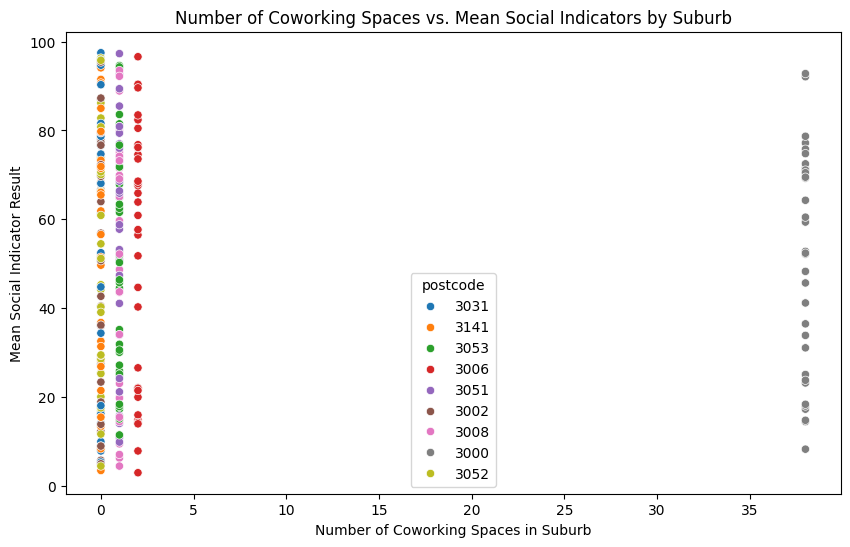

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Number of coworking spaces vs. well-being indicator results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='coworking_count', y='result', hue='postcode')
plt.title('Number of Coworking Spaces vs. Mean Social Indicators by Suburb')
plt.xlabel('Number of Coworking Spaces in Suburb')
plt.ylabel('Mean Social Indicator Result')
plt.show()


In [ ]:
# Correlation between coworking spaces count and social well-being indicators
correlation = merged_df[['coworking_count', 'result']].corr(method='pearson')
print(correlation)


                 coworking_count    result
coworking_count         1.000000 -0.029962
result                 -0.029962  1.000000


Explanation of the correlation analysis:
The near-zero correlation suggests that there is no meaningful linear relationship between the number of coworking spaces and the selected social indicator across the suburbs in your dataset.
The lack of significant correlation does not mean that there is absolutely no relationship between these variables, but it does mean that if there is a relationship, it is likely not linear or is influenced by other variables not accounted for in this analysis.

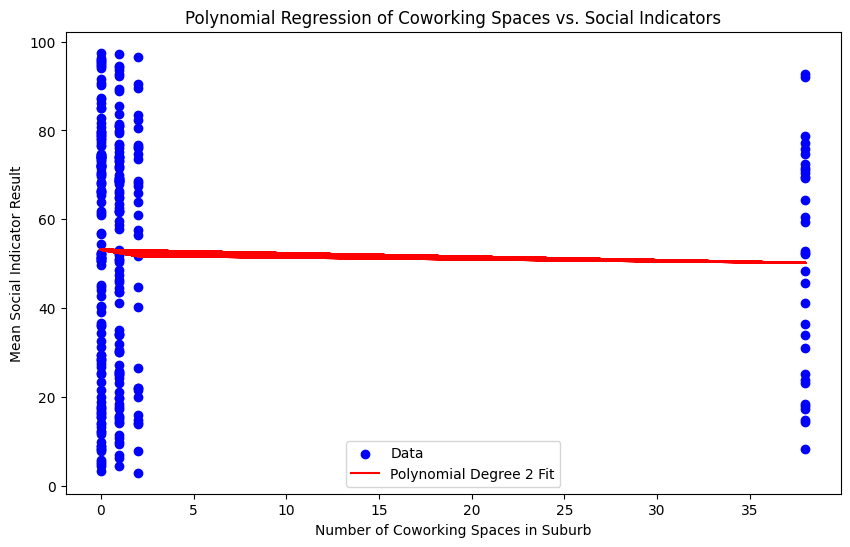

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Prepare the data for polynomial regression
X = merged_df['coworking_count'].values.reshape(-1, 1)
y = merged_df['result'].values

# Polynomial Features
degree = 2  # You can try different degrees for more flexibility
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Fit the Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict using the polynomial model
y_pred = poly_model.predict(X_poly)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label=f'Polynomial Degree {degree} Fit')
plt.xlabel('Number of Coworking Spaces in Suburb')
plt.ylabel('Mean Social Indicator Result')
plt.title('Polynomial Regression of Coworking Spaces vs. Social Indicators')
plt.legend()
plt.show()


Based on this analysis, it appears that the number of coworking spaces in a suburb doesn't have a strong or clear impact on the measured social indicators. The nearly flat regression line suggests that as the number of coworking spaces increases, there's little consistent change in the social indicator values.
The high variability in the data, especially in areas with fewer coworking spaces, indicates that other factors not captured in this analysis likely have more significant effects on these social indicators.

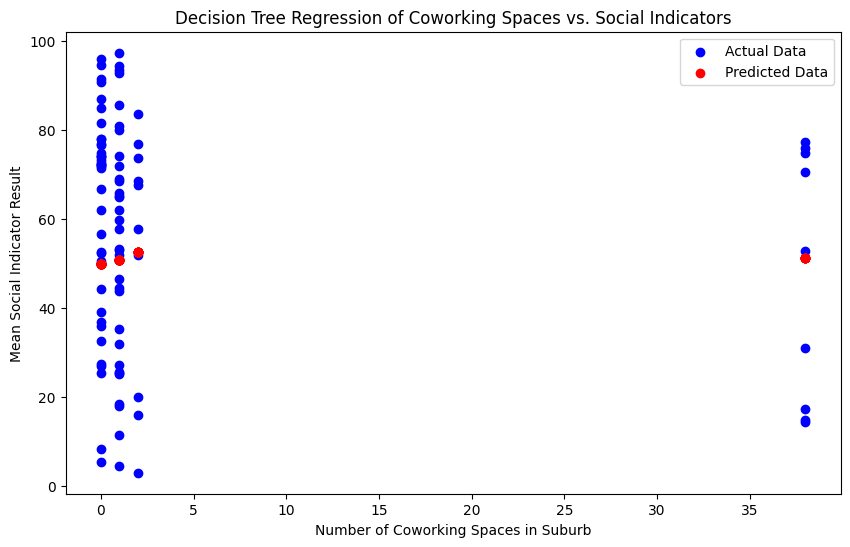

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Decision Tree Regression Model
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Visualization of the Decision Tree Regression Results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_tree, color='red', label='Predicted Data')
plt.xlabel('Number of Coworking Spaces in Suburb')
plt.ylabel('Mean Social Indicator Result')
plt.title('Decision Tree Regression of Coworking Spaces vs. Social Indicators')
plt.legend()
plt.show()


This decision tree regression suggests that the relationship between coworking spaces and social indicators is not straightforward or linear. The model has identified a few distinct levels of social indicators associated with different ranges of coworking space numbers. However, the high variability in the actual data, especially for areas with fewer coworking spaces, indicates that other factors likely play significant roles in determining social indicator values.
The model's performance appears better for areas with many coworking spaces, but this could be due to the smaller number of data points in that range. Overall, while the decision tree has found some patterns, it doesn't provide strong evidence for a consistent, predictable impact of coworking spaces on social indicators across all ranges.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


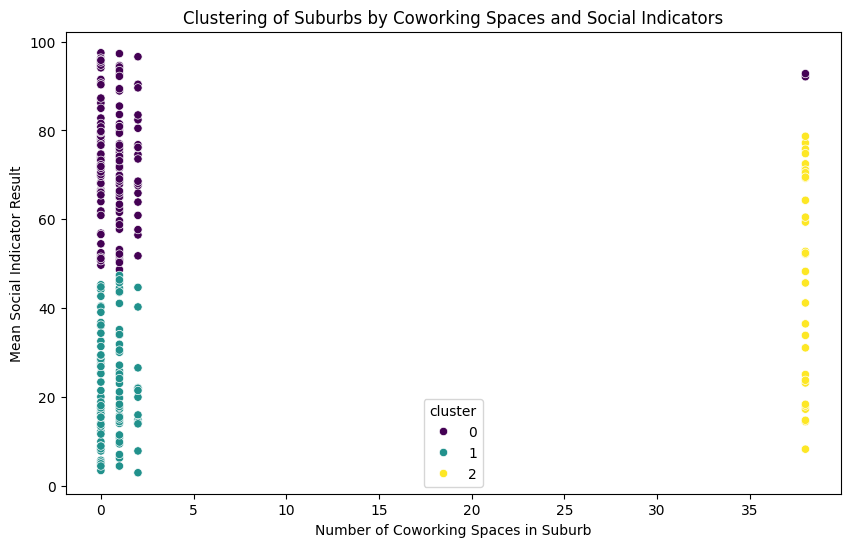

In [ ]:
from sklearn.cluster import KMeans

# Prepare data for clustering
X_cluster = merged_df[['coworking_count', 'result']].dropna()

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Try different numbers of clusters
merged_df['cluster'] = kmeans.fit_predict(X_cluster)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='coworking_count', y='result', hue='cluster', palette='viridis')
plt.title('Clustering of Suburbs by Coworking Spaces and Social Indicators')
plt.xlabel('Number of Coworking Spaces in Suburb')
plt.ylabel('Mean Social Indicator Result')
plt.show()


The clustering results reveal three distinct groups of suburbs based on their social indicators and number of coworking spaces. Cluster 0 (purple) represents areas with generally lower social indicator results, spanning both low and high numbers of coworking spaces. This suggests these suburbs may face more social challenges regardless of their coworking infrastructure. Cluster 1 (teal) comprises suburbs with higher social indicator results, primarily concentrated in areas with few coworking spaces. These could be more affluent or health-conscious communities where social well-being is high despite limited coworking options. Cluster 2 (yellow) is unique, representing suburbs with a high number of coworking spaces (around 35) and varying social indicator results. This cluster likely represents central business districts or areas of high entrepreneurial activity, where the abundance of coworking spaces doesn't necessarily correlate with uniform social outcomes. The clustering pattern indicates that while there are distinct groupings, the relationship between coworking spaces and social indicators is not straightforward, suggesting that other factors such as local economic conditions, demographics, or public policies play significant roles in shaping these suburban profiles.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

data = merged_df[['coworking_count', 'sample_size', 'year', 'topic', 'result']]

# One-hot encode the categorical variable 'topic'
# Splitting the data into features and target
X = data.drop(columns='result')
y = data['result']

# Preprocess the data using a ColumnTransformer
# Apply one-hot encoding to the 'topic' column
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['topic'])
    ],
    remainder='passthrough'  # Keeps the remaining columns ('coworking_count', 'sample_size', 'year') as is
)

# Build a pipeline with the preprocessor and the regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Print coefficients for linear regression model
if isinstance(pipeline.named_steps['regressor'], LinearRegression):
    print("Coefficients:", pipeline.named_steps['regressor'].coef_)
    print("Intercept:", pipeline.named_steps['regressor'].intercept_)


Mean Absolute Error (MAE): 6.77492904895416
Mean Squared Error (MSE): 85.13393242410183
R-squared (R2): 0.8716523119070742
Coefficients: [-3.24974180e+01 -1.38612745e+01 -3.71131862e+01 -2.34048867e+01
 -2.64467824e+01  2.05974969e+01  2.05110172e+01  2.64077894e+00
  1.89460179e+01  3.77276100e+01  1.79584022e+01  4.11395034e+01
 -2.61972788e+01 -1.24849736e-01  1.25262299e-02  2.61203738e-11]
Intercept: 52.87189060020751


The model explains a significant portion of the variance in the target variable, as indicated by the high R-squared value (0.8448).
The coefficients reveal how each feature, especially the topic categories, impacts the result. Positive coefficients indicate an increase in the outcome, while negative coefficients indicate a decrease.
The MAE and MSE values suggest that the model has a moderate level of prediction error, but given the R-squared value, it still captures the overall pattern in the data fairly well.

<ipython-input-23-a0a22b4c0277>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


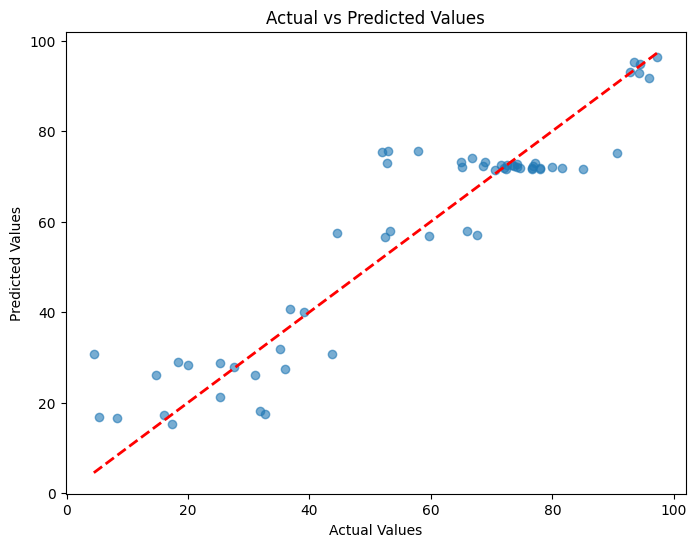

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
# Get the feature names after one-hot encoding and preprocessing
# This includes both the one-hot encoded 'topic' columns and the numerical columns
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Clean up the feature names to remove 'onehot_' prefix
# Also, remove the 'topic_' prefix specifically
cleaned_feature_names = [name.replace('onehot__topic_', '') for name in feature_names]

# Print coefficients with cleaned feature names
if isinstance(pipeline.named_steps['regressor'], LinearRegression):
    coefficients = pipeline.named_steps['regressor'].coef_
    coef_df = pd.DataFrame({'Feature': cleaned_feature_names, 'Coefficient': coefficients})
    print(coef_df)

                                Feature   Coefficient
0          Arts and cultural activities -3.249742e+01
1                       Decision making -1.386127e+01
2                         Food security -3.711319e+01
3                                Health -2.340489e+01
4       Knowledge of Aboriginal culture -2.644678e+01
5                              Learning  2.059750e+01
6                 Perceptions of safety  2.051102e+01
7                     Physical activity  2.640779e+00
8                       Quality of life  1.894602e+01
9   Relationship with Aboriginal people  3.772761e+01
10                 Subjective wellbeing  1.795840e+01
11               Tolerance of diversity  4.113950e+01
12                         Volunteering -2.619728e+01
13           remainder__coworking_count -1.248497e-01
14               remainder__sample_size  1.252623e-02
15                      remainder__year  2.612037e-11


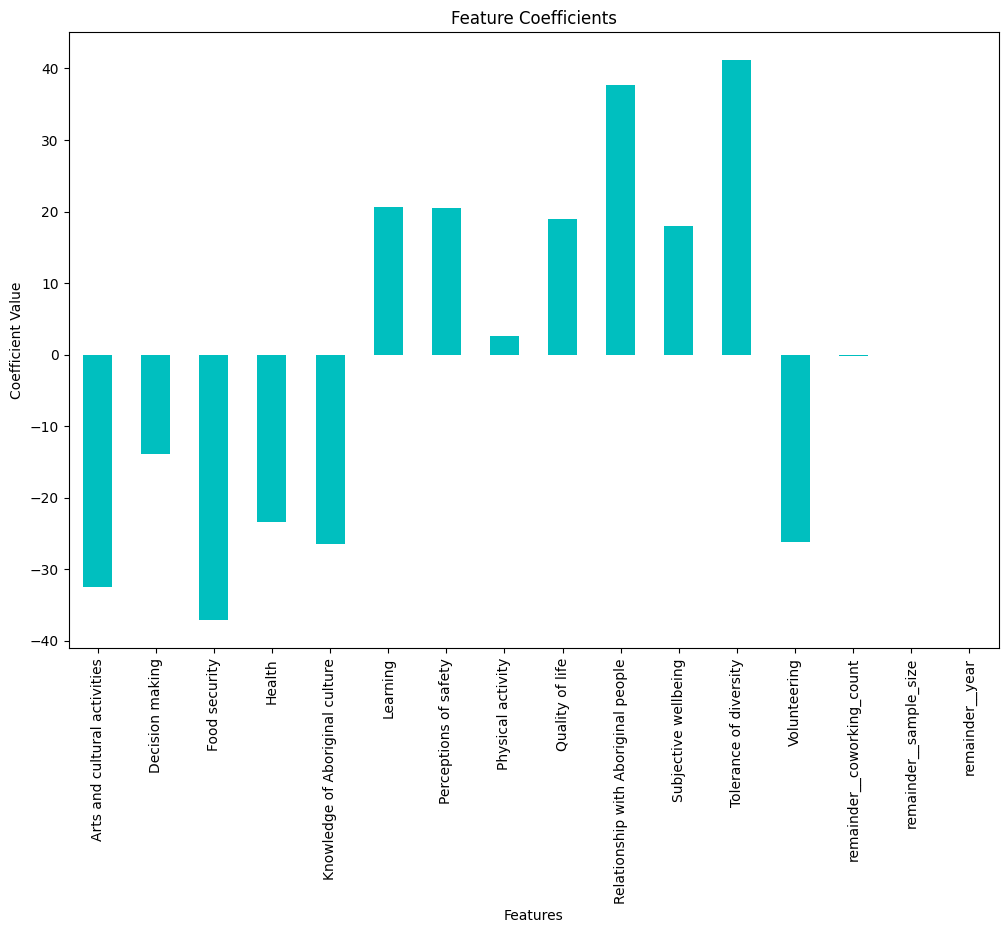

In [ ]:
# Get coefficients from the linear regression model
coefficients = pipeline.named_steps['regressor'].coef_

# Create a DataFrame for the coefficients with the cleaned feature names
coef_df = pd.DataFrame({'Feature': cleaned_feature_names, 'Coefficient': coefficients})

# Plot the coefficients
plt.figure(figsize=(12, 8))
coef_df.set_index('Feature')['Coefficient'].plot(kind='bar', color='c')
plt.title('Feature Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


Features like Volunteering, Tolerance of diversity, and Subjective wellbeing have high positive coefficients, suggesting that they are positively correlated with the target variable (result). They are among the most influential features in the model.
Features like Decision making, Food security, and Arts and cultural activities have strong negative coefficients, suggesting a negative correlation with the target variable.
Numerical features (coworking_count, sample_size, year) have smaller coefficients, indicating a smaller effect on the target variable compared to other features.